# Бибилиотеки

In [1]:
from sympy import *
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
init_printing(use_latex=True)

# 1

Плотность распределения случайной величины $X$ имеет вид: $f(x) = ae^{−\lambda |x|}$.

Найдите:   
a) коэффициент a;   
б) функцию распределения случайной величины X;   
в) $\mathbb E(X)$ и $Var(X)$.   

$\int_{- \infty}^{+ \infty} f(x) \,dx = 1
\Rightarrow
\int_{- \infty}^{+ \infty} ae^{−\lambda |x|} \,dx = 1 \Rightarrow 2a \frac{1}{-\lambda e^{\lambda x}} \bigg|_{0}^{+ \infty} = 1 \Rightarrow \frac{2a}{\lambda} = 1 \Rightarrow a = \frac{\lambda}{2}$  

$f(x) = \frac{\lambda}{2} e^{-\lambda |x|}$

$F_X(x) = \int_{- \infty}^{x} f(x) \,dx= \frac{\lambda}{2} \int_{- \infty}^{x} e^{-\lambda |x|} \,dx= $  


$$
\begin{cases}
- \frac{\lambda}{2} \frac{1}{\lambda e^{\lambda x}}, & x \geqslant 0 \\
\frac{\lambda}{2} \frac{e^{\lambda x}}{\lambda}, & x < 0 \\
\end{cases}

\Rightarrow

\begin{cases}
- \frac{1}{2 e^{\lambda x}}, & x \geqslant 0 \\
\frac{e^{\lambda x}}{2}, & x < 0 \\
\end{cases}
$$

$\mathbb E(x) = \int_{- \infty}^{+ \infty} xf(x) \,dx = \frac{\lambda}{2} \int_{- \infty}^{+ \infty} x e^{-\lambda |x|}\,dx= - \frac{x}{\lambda e^{\lambda x}} \bigg|_{-\infty}^{\infty} - \frac{1}{\lambda^2 e^{\lambda x}} \bigg|_{-\infty}^{\infty} = 0$  

$Var(X) = \int_{- \infty}^{\infty} x^2 f(x) \,dx = \frac{\lambda}{2} \int_{- \infty}^{\infty} x^2 e^{-\lambda |x|} \,dx =  \frac{2}{\lambda ^ 2}$

## Кодом

In [45]:
x, a = symbols('x, a')
l = Symbol('lambda', real=True)

f = a * exp(-l * abs(x))

integrate(f,(x,-oo,oo))

⎧      2⋅a                       π
⎪      ───        for │arg(λ)│ < ─
⎪       λ                        2
⎪                                 
⎪∞                                
⎨⌠                                
⎪⎮     -λ⋅│x│                     
⎪⎮  a⋅ℯ       dx     otherwise    
⎪⌡                                
⎪-∞                               
⎩                                 

In [46]:
solve(2 * a / l - 1, a)

In [51]:
f = x * l / 2 * exp(-l * abs(x))
integrate(f, (x, -oo, oo))

⎧                                  π
⎪        0          for │arg(λ)│ < ─
⎪                                  2
⎪                                   
⎪∞                                  
⎪⌠                                  
⎨⎮       -λ⋅│x│                     
⎪⎮  λ⋅x⋅ℯ                           
⎪⎮  ─────────── dx     otherwise    
⎪⎮       2                          
⎪⌡                                  
⎪-∞                                 
⎩                                   

In [53]:
f = x ** 2 * l / 2 * exp(-l * abs(x))
integrate(f, (x, -oo, oo))

⎧        2                          π
⎪        ──          for │arg(λ)│ < ─
⎪         2                         2
⎪        λ                           
⎪                                    
⎪∞                                   
⎨⌠                                   
⎪⎮     2  -λ⋅│x│                     
⎪⎮  λ⋅x ⋅ℯ                           
⎪⎮  ──────────── dx     otherwise    
⎪⎮       2                           
⎪⌡                                   
⎩-∞                                  

# 2

Случайная величина $X$ имеет плотность распределения $f(x) = \frac{1}{\pi} \frac{1}{1 + x^2}$
стандартное распределение Коши $Co(0; 1)$.  
Найдите вероятности:   
a) $\mathbb P(X > 1)$;  
б) $\mathbb P(|X| > 1)$.

## Аналитика

$\mathbb P(X > 1) = \int_{1}^{+ \infty} f(x) = \frac{1}{\pi} \int_{1}^{+\infty} \frac{1}{1 + x^2} = \frac{1}{\pi} arctg(x) \bigg|_{1}^{+\infty} = \frac{1}{\pi} \cdot (\frac{\pi}{2} - \frac{\pi}{4}) = \frac{1}{4}$  
$\mathbb P(|X| > 1) = \mathbb P(X > 1) + \mathbb P(X < -1) = \frac{1}{4} + \frac{1}{\pi} arctg(x) \bigg|_{- \infty}^{-1} = \frac{1}{4} + \frac{1}{\pi} \cdot (- \frac{\pi}{4} - - \frac{\pi}{2}) = \frac{1}{2}$

## Кодом

In [63]:
f = 1 / pi * 1 / (1 + x ** 2)
integrate(f, (x, 1, oo))

In [65]:
integrate(f, (x, 1, oo)) + integrate(f, (x, -oo, -1))

In [69]:
X = cauchy(loc=0, scale=1)
X.sf(1)

In [68]:
X.cdf(-1) + X.sf(1)

## 3

Пусть случайные величины $X$ имеет показательное распределение с параметром $ \lambda = \frac{1}{3} $
Найдите вероятности:   
а) $\mathbb P(X > 3)$   
б) $\mathbb P(X > 6 | X > 3)$   
в) $\mathbb P(X > t + 3 | X > t)$

## Аналитика

$ F_X(x) = 
\begin{cases}
0, & x \leqslant 0 \\
1 - e^{-\frac{1}{3} x}, & x \geqslant 0
\end{cases}$  

$\mathbb P(X > 3) = \mathbb F_X(+ \infty) - \mathbb F_X(3) = 1 - e^{-\frac{1}{3} \cdot 3} = 1 - \frac{1}{e}$

$\mathbb P(X > 6 | X > 3) = \frac{\mathbb P(X > 3 \cap X > 6)}{\mathbb P(X > 3)} = \frac{\mathbb P(X > 6)}{\mathbb P(X > 3)} = \frac{1 - \frac{1}{e^2}}{1 - \frac{1}{e}} = \frac{1}{e} + 1$  

$\mathbb P(X > 6) = \mathbb F_X(+ \infty) - \mathbb F_X(6) = 1 - e^{-\frac{1}{3} \cdot 6} = 1 - \frac{1}{e^2}$  
$\mathbb P(X > 3) = 1 - \frac{1}{e}$

$\mathbb P(X > t + 3 | X > t) = \frac{\mathbb P((X > t + 3) \cap (X > t))}{\mathbb P(X > t)} = \frac{\mathbb P(X > t + 3)}{\mathbb P(X > t)} = \frac{1 - \frac{1}{e^\frac{t + 3}{3}}}{1 - \frac{1}{e^\frac{t}{3}}} = \frac{e^\frac{t+3}{3} - 1}{e^{\frac{t}{3} + 1} - 3}$

$\mathbb P(X > t) = 1 - \frac{1}{e^\frac{t}{3}}, \mathbb P(X > t + 3) = 1 - \frac{1}{e^\frac{t + 3}{3}}$

# 4

Пусть $X$ – случайная величина, равномерно распределенная на $[−1; 1]$. Найдите распределение случайной величины $Y = |X|$.

## Аналитика
$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(|X| \leqslant y)$

$|X| \leqslant y \Rightarrow -y \leqslant X \leqslant y$.

Таким образом, $F_Y(y) = P(-y \leqslant X \leqslant y) = \frac{y - (-y)}{2} = \frac{2y}{2} = y$ для $0 \leqslant y \leqslant 1$.

Итак, распределение случайной величины $Y = |X|$:
$$
F_Y(y) = 
\begin{cases} 
0, & y < 0, \\
y, & 0 \leqslant y \leqslant 1, \\
1, & y > 1.
\end{cases}
$$

$\mathbb P(a \leqslant X \leqslant b) = F_X(b) - F_X(a)$

# 5

Случайная величина $X$ равномерно распределена на отрезке $[0; 1]$. Найдите плотность распределения случайной величины:
- $Y = X^2$;
- $Y = \frac{1}{X}$;
- $Y = e^X$ и построить их графики

## Аналитика

$$F_X(x) = 
\begin{cases}
0, & x < 0 \\
x, & 0 \leqslant x \leqslant 1 \\
1, & x > 1
\end{cases}
$$

1. $Y = X^2$  

$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(X^2 \leqslant y)$    
$F_Y(y) = \mathbb P(-sqrt{y} \leqslant X \leqslant \sqrt{y}) = F_X(\sqrt{y}) - F_X(- \sqrt{y}) = F_X(2 \sqrt{y}) = 
\begin{cases}
0, & y < 0 \\
2 \sqrt{y}, & 0 \leqslant y \leqslant 1 \\
1, & y > 1
\end{cases}
$  
$f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{1}{\sqrt{y}}$


2. $Y = \frac{1}{X}$  

$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(\frac{1}{X} \leqslant y) = \mathbb P(X \geqslant \frac{1}{y}) = 1 - \frac{1}{y}$  
$f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{1}{y^2}$

3. $Y = e^X$

$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(e^X \leqslant y) = \mathbb P(X \leqslant ln y) = ln y$  
$f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{1}{y}$

## Кодом

(array([15861., 13573., 11969., 10915.,  9741.,  8959.,  8103.,  7400.,
         6975.,  6504.]),
 array([1.0000115 , 1.17183593, 1.34366035, 1.51548478, 1.68730921,
        1.85913364, 2.03095807, 2.20278249, 2.37460692, 2.54643135,
        2.71825578]),
 <BarContainer object of 10 artists>)

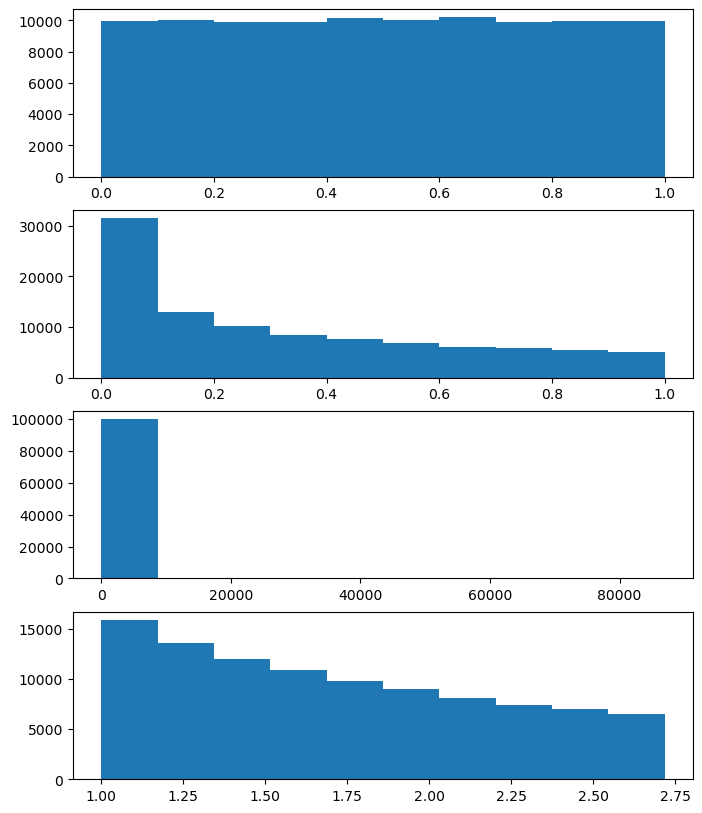

In [105]:
X = uniform()
xax = np.linspace(0, 1, 100_000)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))

X_values = X.rvs(size=100_000)

ax1.hist(X_values, bins=10)

Y_values = X_values ** 2

ax2.hist(Y_values, bins=10)

Y_values = 1 / X_values

ax3.hist(Y_values, bins=10)

Y_values = np.e ** X_values

ax4.hist(Y_values, bins=10)

# 6

Плотность распределения случайной величины $X$ равна $f(x) = \frac{1}{\pi} \frac{1}{1 + x^2}$. Найдите распределение случайной величины $Y = arctg(X)$.

## Аналитика

$F_X(x) = \frac{1}{\pi} arctg(x) \bigg|_{- \infty}^{+ \infty} = \frac{1}{\pi} \cdot (\frac{\pi}{2} - -\frac{\pi}{2}) = 1$

$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(arctg(X) \leqslant y) = \mathbb P(X \leqslant arctg(y)) = F_X(arctg(y)) - F_X(- \infty) = 0$

# 7

Случайная величина $X$ равномерно распределена на отрезке $[0; 2]$. Найдите функцию распределения случайной величины $Y = |X − 1|$

## Аналитика
$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(|X - 1| \leqslant y)$

$|X - 1| \leqslant y \Rightarrow -y \leqslant X - 1 \leqslant y \Rightarrow 1-y \leqslant X \leqslant y+1$.

Таким образом, $F_Y(y) = P(1-y \leqslant X \leqslant y+1) = \frac{x - 0}{1} \bigg|_{1-y}^{y+1} = 2y$ для $0 \leqslant y \leqslant 1$.

Итак, распределение случайной величины $Y = |X|$:
$$
F_Y(y) = 
\begin{cases} 
0, & y < 0, \\
2y, & 0 \leqslant y \leqslant 1, \\
1, & y > 1.
\end{cases}
$$

# 8

Случайная величина $X$ равномерно распределена на отрезке $[a; b]$. Найдите $a$ и $b$, если $\mathbb E(X^2) = 1$ и $\mathbb E(X) = -\mathbb E(X^3)$.

## Аналитика
$f(x) = \frac{1}{b-a}$


$\mathbb E(X^2) = \int_{- \infty}^{+ \infty} x^2 f(x) \,dx = \frac{1}{b-a} \int_{a}^{b} x^2 \,dx = \frac{1}{b-a} \cdot \frac{b^3 - a^3}{3} = \frac{a^2 + ab + b^2}{3} = 1$

$\mathbb E(X) = -\mathbb E(X^3)$ 

$\mathbb E(X^3) = \int_{- \infty}^{+ \infty} x^3 f(x) \,dx = \frac{1}{b-a} \int_{a}^{b} x^3 \,dx = \frac{1}{b-a} \cdot \frac{b^4 - a^4}{4} = \frac{(a^2 + b^2) \cdot (a + b)}{4}$

$\mathbb E(X) = \int_{- \infty}^{+ \infty} x f(x) \,dx = \frac{1}{b-a} \int_{a}^{b} x \,dx = \frac{1}{b-a} \cdot \frac{b^2 - a^2}{2} = \frac{a + b}{2}$

$
\begin{cases}
\frac{a^2 + ab + b^2}{3} = 1 \\
\frac{(a^2 + b^2) \cdot (a + b)}{4} = - \frac{a + b}{2}
\end{cases} 
\Rightarrow
\begin{cases}
a = -\sqrt{3} \\
b = \sqrt{3}
\end{cases}
$

# 9 

Случайная величина $X$ равномерно распределена на отрезке $[0; 1]$. Найдите $\rho(X; X^3)$.

In [37]:
X = uniform(loc=0, scale=1)

In [38]:
X_values = X.rvs(size=100_000)

np.corrcoef(X_values, X_values ** 3)

array([[1.       , 0.9163068],
       [0.9163068, 1.       ]])

# 12

Случайная величина $X$ распределена по показательному закону. Найдите
математическое ожидание $\mathbb E[(X−9)(10−X)]$, если дисперсия $\mathbb Var[10 − 4X] = 9$

## Аналитика

$\mathbb Var(10-4X) = 9 \Rightarrow \mathbb Var(10) + \mathbb Var(4X) = 9 \Rightarrow 16 \mathbb Var(X) = 9 \Rightarrow \lambda = \frac{4}{3}$

$\mathbb E[(X-9)(10-X)] = \mathbb E[-X^2+19X-90] = 19 \mathbb E(X) - \mathbb E(90) - \mathbb E(X^2) = 19 \cdot \frac{1}{\lambda} - 90 - \frac{1}{\lambda^2} = \frac{19}{\lambda} - \frac{1}{\lambda^2} - 90$

# 13

Случайная величина $X$ имеет распределение Коши с плотностью распределения $f(x) = \frac{b}{\pi [b^2 + (x - a)^2]}$ . Найдите плотность распределения случайной
величины $Y = \frac{1}{X}$

# Аналитика

$\int f(x) \,dx = -\frac{1}{\pi} \cdot arctg(\frac{a-x}{b})$

$F_Y(y) = \mathbb P(Y \leqslant y) = \mathbb P(\frac{1}{X} \leqslant y)$

$\frac{1}{X} \leqslant y \Rightarrow \frac{1 - X \cdot y}{X} \leqslant 0 \Rightarrow$
$
\begin{cases}
y = 0, X < 0 \\
y > 0, X \in (-\infty; 0) \cup [\frac{1}{y}; \infty) \\
y < 0, X \in [\frac{1}{y}; 0)
\end{cases}
$

$F_Y(y) = 
\begin{cases}
y = 0, \int_{-\infty}^0 f(x) \,dx \\
y > 0, \int_{-\infty}^0 f(x) \,dx + \int_{-\frac{1}{y}}^{+\infty} f(x) \,dx  \\
y < 0, \int_{-\frac{1}{y}}^0 f(x) \,dx
\end{cases}
\Rightarrow
\begin{cases}
y = 0,  -\frac{1}{\pi} \cdot arctg(\frac{a-x}{b}) \bigg|_{-\infty}^0 \\
y > 0, -\frac{1}{\pi} \cdot arctg(\frac{a-x}{b}) \bigg|_{-\infty}^0 + -\frac{1}{\pi} \cdot arctg(\frac{a-x}{b}) \bigg|_{-\frac{1}{y}}^{+\infty}  \\
y < 0, -\frac{1}{\pi} \cdot arctg(\frac{a-x}{b}) \bigg|_{-\frac{1}{y}}^0
\end{cases} 
\Rightarrow \\
\Rightarrow
\begin{cases}
y = 0,  -\frac{1}{\pi} \cdot (arctg(\frac{a}{b}) + \frac{1}{2}) \\
y > 0, -\frac{1}{\pi} \cdot (arctg(\frac{a}{b}) + \frac{1}{2}) + +\frac{1}{\pi} \cdot (\frac{1}{2} + \frac{\pi}{2}) \\
y < 0, -\frac{1}{\pi} \cdot (arctg(\frac{a}{b}) - ...)arctg(\frac{a-x}{b}) \bigg|_{-\frac{1}{y}}^0
\end{cases} $

# 14

Пусть с.в. $X \sim Ca(1; 2)$. Найдите вероятность $\mathbb P(\frac{1}{X} > 3)$ и покажите статистическую устойчивость полученной вероятности.

## Аналитика

$\frac{1}{X} \sim Ca(\frac{a}{a^2 + b^2}; \frac{b}{a^2 + b^2}) = Ca(\frac{1}{5}; \frac{2}{5})$

$f_Y(y) = \frac{\frac{2}{5}}{\pi \cdot ((x - \frac{1}{5})^2 + \frac{2}{5}^2)}$

$\mathbb P(\frac{1}{X} > 3) = \int_3^{\infty} \frac{\frac{2}{5}}{\pi \cdot ((x - \frac{1}{5})^2 + \frac{2}{5}^2)} \,dx = \frac{1}{\pi} \cdot arctg(\frac{5x-1}{2}) \bigg|_3^{\infty} = \frac{1}{2} - \frac{1}{\pi} arctg(7)$

In [41]:
X = cauchy(1, 2)

X.cdf(1/3) - X.cdf(0)

In [44]:
from tqdm.notebook import tqdm

In [45]:
N = 10_000
x = np.arange(1, N+1)
y = []

for n in tqdm(range(1,N+1)):
    X_values = X.rvs(size=n)

    X_values = 1/X_values

    y.append(X_values[X_values > 3].size / n)

  0%|          | 0/10000 [00:00<?, ?it/s]

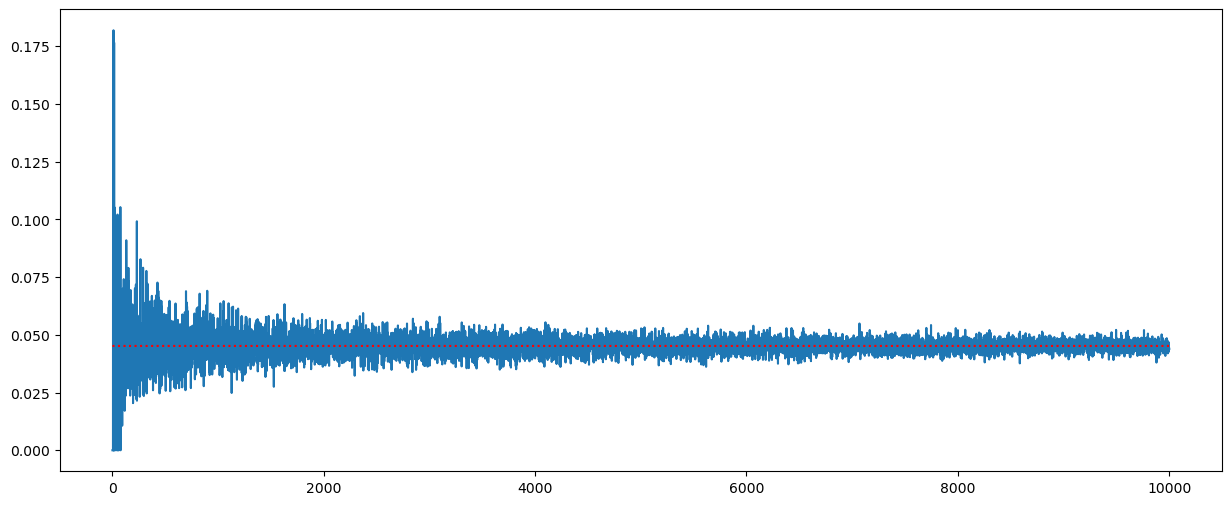

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(x, y)
plt.plot(x, [0.045167] * N, color='r', linestyle='dotted')

# 15
На окружности радиуса $R$ берут две точки с равномерным распределением. Найдите функцию распределения расстояния $\gamma$ между ними и вычислите $\mathbb E(\gamma)$. Используя инструментарий IPython, постройте график зависи-
мости среднего значения расстояния от числа экспериментов для $R = 1$.

## Аналитика

Зададим распределение для каждой из координаты, тогда:   

$X_1 \sim U([-R; R]); X_2 \sim U([-R; R]); Y_1 \sim U([-R; R]); Y_2 \sim U([-R; R])$

$A = (X_1; Y_1); B = (X_2; Y_2)$

$\gamma = \sqrt{A^2 - B^2} = \sqrt{(X_1^2 - X_2^2) + (Y_1^2 - Y_2^2)}$

# 18

Абсолютно непрерывная случайная величина $X$ может принимать значения только в отрезке $[4; 7]$. На этом отрезке плотность распределения случайной величины X имеет вид: $f(x) = C (1 + 3x^{0,5} + 6x^{0,7} + 9x^{0,9})^{1,5}$, где $C$ – положительная константа. Найдите:
1) константу $C$;
2) математическое ожидание $\mathbb E(X)$;
3) стандартное отклонение $\sigma_X$ ;
4) квантиль уровня $0,8$ распределения $X$.

## Аналитикой

$\int_{4}^{7} f(x) \,dx = 1 \Rightarrow C \int_{4}^{7} (1 + 3x^{0,5} + 6x^{0,7} + 9x^{0,9})^{1,5} \,dx = 1 \Rightarrow C = 0,000573$

$\mathbb E(X) = \int_{4}^{7} x f(x) \,dx = 5,6608$

$\sigma_X = \sqrt{Var(X)} = \sqrt{\int_{4}^{7} x^2 f(x) \,dx - \mathbb E^2(X)} = \sqrt{32,77117 - 32,04512} = 0,8521$

In [3]:
def f(x):
    return (1 + 3 * x ** 0.5 + 6 * x ** 0.7 + 9 * x ** 0.9) ** 1.5

In [9]:
from scipy import integrate
C = 1 / integrate.quad(f, 4, 7)[0]
C

In [14]:
def xf(x):
    return C * x * (1 + 3 * x ** 0.5 + 6 * x ** 0.7 + 9 * x ** 0.9) ** 1.5

In [20]:
integrate.quad(xf, 4, 7)[0]

In [17]:
def x2f(x):
    return C * x ** 2 * (1 + 3 * x ** 0.5 + 6 * x ** 0.7 + 9 * x ** 0.9) ** 1.5

In [18]:
integrate.quad(x2f, 4, 7)[0]

In [ ]:
a, b = 4, 7

while abs(b - a) >= 0.00001:
    p = (a + b) / 2
    q = integrate.quad(f, 4, p)[0]

    if q > 0.8:
        b = p
    
    elif q == 0.8:
        break

    else:
        a = p 

In [ ]:
p

# 19

Случайная величина $X$ равномерно распределена на отрезке $[4; 8]$. Случайная величина $Y$ выражается через $X$ следующим образом:
$Y = (1 + 6X^{0,5} + 4X^{0,7} + 5X^{0,9})^{1,3}$.
Найдите:
1) математическое ожидание $\mathbb E(Y)$;
2) стандартное отклонение $\sigma_Y$ ;
3) асимметрию $As(Y)$;
4) квантиль уровня $0,8$ распределения $Y$ .

## Аналитика
$$

## Стохастически

In [29]:
X = uniform(loc=4, scale=4)

In [32]:
X_values = X.rvs(size=1_000_000)

Y_values = (1 + 6 * X_values ** 0.5 + 4 * X_values ** 0.7 + 5 * X_values ** 0.9) ** 1.3

In [33]:
Y_values.mean()

In [34]:
np.std(Y_values)

In [35]:
skew(Y_values)

In [36]:
np.quantile(Y_values, 0.8)